In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, concatenate
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import LabelEncoder
import os
import pandas as pd
import numpy as np
from keras.preprocessing.image import img_to_array, load_img
from sklearn.preprocessing import LabelEncoder


import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('student_features.csv')

In [3]:
# Assuming 'Student' is the label and the rest are features
X = df.drop(['Student', 'Image Name'], axis=1)
y = df['Student']

# Encode the categorical labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a neural network model with dropout and L2 regularization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(set(y_encoded)), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping criteria
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model on the training data
model.fit(X_train_scaled, y_train, epochs=2000, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print('Test accuracy:', test_acc)

Epoch 1/2000
7/7 [==============================] - 0s 17ms/step - loss: 4.8089 - accuracy: 0.0183 - val_loss: 4.7488 - val_accuracy: 0.0364
Epoch 2/2000
7/7 [==============================] - 0s 3ms/step - loss: 4.7016 - accuracy: 0.0275 - val_loss: 4.6779 - val_accuracy: 0.0545
Epoch 3/2000
7/7 [==============================] - 0s 3ms/step - loss: 4.6395 - accuracy: 0.0367 - val_loss: 4.6154 - val_accuracy: 0.0364
Epoch 4/2000
7/7 [==============================] - 0s 3ms/step - loss: 4.5627 - accuracy: 0.0321 - val_loss: 4.5590 - val_accuracy: 0.0364
Epoch 5/2000
7/7 [==============================] - 0s 3ms/step - loss: 4.4954 - accuracy: 0.0459 - val_loss: 4.5124 - val_accuracy: 0.0182
Epoch 6/2000
7/7 [==============================] - 0s 3ms/step - loss: 4.4932 - accuracy: 0.0413 - val_loss: 4.4652 - val_accuracy: 0.0000e+00
Epoch 7/2000
7/7 [==============================] - 0s 3ms/step - loss: 4.4110 - accuracy: 0.0367 - val_loss: 4.4198 - val_accuracy: 0.0000e+00
Epoch 8/200

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

# Load data
df = pd.read_csv('student_features.csv')

# Prepare features and labels
X = df[['Canny Edge', 
        'Sobel Edge', 
        'HOG Features', 
        'Endpoints', 
        'Thickness', 
        'Curvature', 
        'Line Irregularity', 
        'LBP Mean']
       ].values
y = LabelEncoder().fit_transform(df['Student'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for scaling and classification
pipeline = make_pipeline(StandardScaler(), SVC(kernel='linear'))

# Train model
pipeline.fit(X_train, y_train)

# Evaluate model
predictions = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))


Accuracy: 0.4057971014492754


In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Assuming your images are resized to 128x128
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
number_of_writers = df['Student'].nunique()
model.add(Dense(number_of_writers, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model on your data


In [7]:
features_df = pd.read_csv('student_features.csv')

## Prepare empty lists to store your data
image_data = []
feature_data = []
labels = []

## Define your image directory
image_dir = '/Users/rheamalhotra/Desktop/student_images/'

## Preprocess and load images
for _, row in features_df.iterrows():
    image_path = os.path.join(image_dir, row['Student'], row['Image Name'])
    if os.path.exists(image_path):
        image = load_img(image_path, color_mode='grayscale', target_size=(128, 128))
        image = img_to_array(image)
        image /= 255.0  # Normalize to [0, 1]
        
        image_data.append(image)
        
        # Extract features excluding 'Student' and 'Image Name'
        features = row.drop(['Student', 'Image Name']).values
        feature_data.append(features)
        
        # Collect the label
        labels.append(row['Student'])

## Convert lists to numpy arrays
X_images = np.array(image_data)
X_features = np.array(feature_data)
y = np.array(labels)

## Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)  # Correctly use y_encoded for one-hot encoding

## Split data into training and testing
X_images_train, X_images_test, X_features_train, X_features_test, y_train, y_test = train_test_split(
    X_images, X_features, y_categorical, test_size=0.2, random_state=42)

## Model Building
# Image Input Branch
image_input = Input(shape=(128, 128, 1), name='image_input')
x1 = Conv2D(32, (3, 3), activation='relu')(image_input)
x1 = MaxPooling2D((2, 2))(x1)
x1 = Flatten()(x1)

# Feature Input Branch
feature_input = Input(shape=(X_features.shape[1],), name='feature_input')
x2 = Dense(64, activation='relu')(feature_input)

# Concatenate
combined = concatenate([x1, x2])

# Final Layers and Output
x = Dense(64, activation='relu')(combined)
output = Dense(y_categorical.shape[1], activation='softmax')(x)

## Model Compilation
model = Model(inputs=[image_input, feature_input], outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Fit the model
model.fit([X_images_train, X_features_train], y_train, validation_split=0.1, epochs=10, batch_size=32)

## Evaluate the model
test_loss, test_acc = model.evaluate([X_images_test, X_features_test], y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [9]:
# Convert lists to numpy arrays and ensure correct data types
X_images = np.array(image_data, dtype='float32')
X_features = np.array(feature_data, dtype='float32')
y = np.array(labels)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Split data into training and testing sets
X_images_train, X_images_test, X_features_train, X_features_test, y_train, y_test = train_test_split(
    X_images, X_features, y_categorical, test_size=0.2, random_state=42)

# Model Building
image_input = Input(shape=(128, 128, 1), name='image_input')
x1 = Conv2D(32, (3, 3), activation='relu')(image_input)
x1 = MaxPooling2D((2, 2))(x1)
x1 = Flatten()(x1)

feature_input = Input(shape=(X_features.shape[1],), name='feature_input')
x2 = Dense(64, activation='relu')(feature_input)

combined = concatenate([x1, x2])

x = Dense(64, activation='relu')(combined)
output = Dense(y_categorical.shape[1], activation='softmax')(x)

model = Model(inputs=[image_input, feature_input], outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit([X_images_train, X_features_train], y_train, validation_split=0.1, epochs=10, batch_size=32)

# Evaluate the model
test_loss, test_acc = model.evaluate([X_images_test, X_features_test], y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

Epoch 1/10
8/8 [==============================] - 1s 90ms/step - loss: 302.3198 - accuracy: 0.0408 - val_loss: 232.7914 - val_accuracy: 0.0357
Epoch 2/10
8/8 [==============================] - 0s 53ms/step - loss: 143.7236 - accuracy: 0.0245 - val_loss: 54.5654 - val_accuracy: 0.0000e+00
Epoch 3/10
8/8 [==============================] - 0s 46ms/step - loss: 14.8523 - accuracy: 0.0082 - val_loss: 3.6358 - val_accuracy: 0.0000e+00
Epoch 4/10
8/8 [==============================] - 0s 47ms/step - loss: 3.6379 - accuracy: 0.0327 - val_loss: 3.6358 - val_accuracy: 0.0000e+00
Epoch 5/10
8/8 [==============================] - 0s 45ms/step - loss: 3.6378 - accuracy: 0.0204 - val_loss: 3.6362 - val_accuracy: 0.0000e+00
Epoch 6/10
8/8 [==============================] - 0s 44ms/step - loss: 3.6377 - accuracy: 0.0163 - val_loss: 3.6367 - val_accuracy: 0.0000e+00
Epoch 7/10
8/8 [==============================] - 0s 43ms/step - loss: 3.6375 - accuracy: 0.0163 - val_loss: 3.6372 - val_accuracy: 0.0000

In [83]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df = pd.read_csv('student_features.csv')
features = df.drop(['Student', 'Image Name'], axis=1)[df['Image Name'].str.contains('LND')]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using silhouette score
silhouette_scores = []
range_clusters = range(2, 11)  # testing from 2 to 10 clusters

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Find the number of clusters with the highest silhouette score
optimal_k = range_clusters[silhouette_scores.index(max(silhouette_scores))]

# Perform k-means clustering with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans_optimal.fit_predict(scaled_features)

optimal_k, max(silhouette_scores)  # Display the optimal number of clusters and the highest silhouette score

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

(2, 0.3863196563717791)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:14

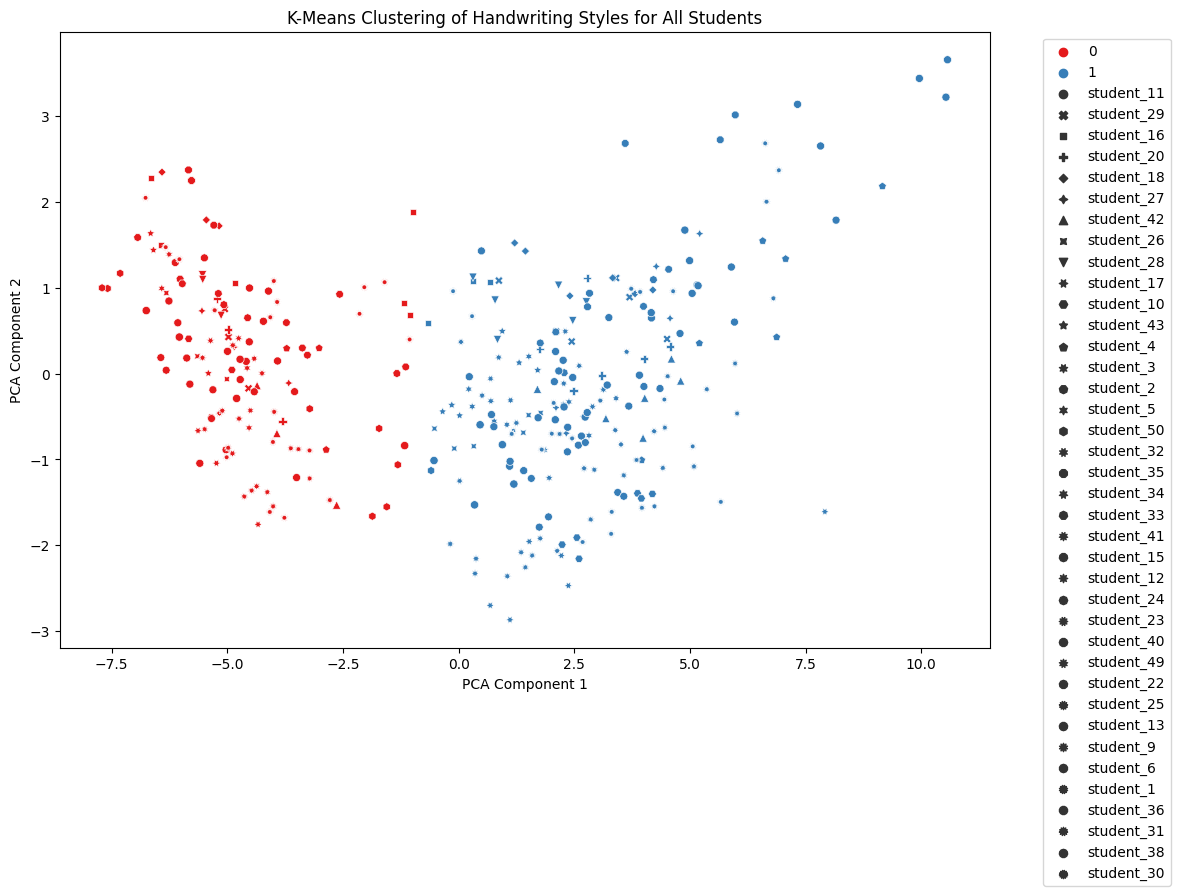

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Apply k-means clustering on the entire scaled dataset
all_features = scaler.transform(df.drop(['Student', 'Image Name'], axis=1))
kmeans_all = KMeans(n_clusters=optimal_k, random_state=42)
all_clusters = kmeans_all.fit_predict(all_features)

# Perform PCA for dimensionality reduction for visualization
pca_all = PCA(n_components=2)
pca_all_data = pca_all.fit_transform(all_features)

# Plot the clusters for all students
plt.figure(figsize=(12, 8))
sns.scatterplot(x=pca_all_data[:, 0], y=pca_all_data[:, 1], hue=all_clusters, style=df['Student'], palette='Set1')
plt.title('K-Means Clustering of Handwriting Styles for All Students')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
# Perform PCA on the entire dataset for visualization
pca_all = PCA(n_components=2)
pca_all_data = pca_all.fit_transform(all_features)

# Add the PCA components and cluster labels to the original data for plotting
df['PCA1'] = pca_all_data[:, 0]
df['PCA2'] = pca_all_data[:, 1]
df['Cluster'] = all_clusters

# Get a list of unique students to create plots for each
unique_students = df['Student'].unique()
num_students = len(unique_students)

# Set up the plotting grid
plt.figure(figsize=(15, num_students * 4))
for i, student in enumerate(unique_students):
    plt.subplot(num_students, 1, i+1)
    student_data = df[df['Student'] == student]
    sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=student_data, palette='Set1')
    plt.title(f'Handwriting Clusters for {student}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()



In [91]:
# Load the dataset
df = pd.read_csv('filtered_students.csv')
original_df = df

unique_students = df['Student'].unique()
num_students = len(unique_students)
print(len(df)) # 38 unique students

15


In [92]:
#### KMEANS
# Drop the columns that won't be used in clustering
df = df.drop(['Student', 'Image Name', 'Percentage Black Pixels', 'Percentage White Pixels'], axis=1)

# Optional: Normalize the features to have mean=0 and variance=1
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Add the cluster assignments back to the original dataframe
df['Cluster'] = clusters

# Add the cluster assignments to the original dataframe
original_df['Cluster'] = clusters

# Check the distribution of 'Student' labels within each cluster
for cluster in sorted(original_df['Cluster'].unique()):
    print(f"Cluster {cluster}:")
    print(original_df[original_df['Cluster'] == cluster]['Student'].value_counts())
    print("\n")


Cluster 0:
Student
student_20    2
student_23    2
student_22    2
Name: count, dtype: int64


Cluster 1:
Student
student_34    3
Name: count, dtype: int64


Cluster 2:
Student
student_4    2
Name: count, dtype: int64


Cluster 3:
Student
student_4     1
student_22    1
Name: count, dtype: int64


Cluster 4:
Student
student_20    1
student_23    1
Name: count, dtype: int64




/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [93]:
from sklearn.metrics import adjusted_rand_score

# Assuming you have the 'clusters' from KMeans and the original 'Student' labels encoded as integers
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(original_df['Student'])
ari_score = adjusted_rand_score(true_labels, clusters)

print(f"Adjusted Rand Index: {ari_score}")


Adjusted Rand Index: 0.26666666666666666


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

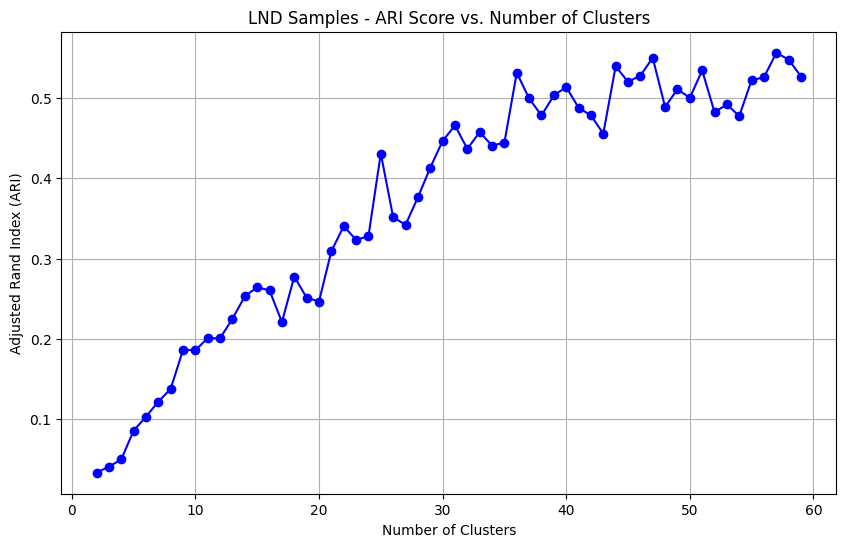

In [71]:
## number of clusters versus Rand score graph:

import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student_features.csv')
df = df[df['Image Name'].str.contains('LND')]

# Prepare the features for clustering
features = df.drop(['Student', 'Image Name', 'Percentage Black Pixels', 'Percentage White Pixels'], axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Encode the 'Student' column to integers
label_encoder = LabelEncoder()
true_labels_encoded = label_encoder.fit_transform(df['Student'])

# Range of cluster numbers to test
range_clusters = range(2, 60)  # Assuming you want to test from 2 to 38 clusters

# Lists to store the number of clusters and the corresponding ARI scores
cluster_numbers = []
ari_scores = []

# Iterate over the range of cluster numbers
for k in range_clusters:
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_features)
    
    # Calculate the ARI score
    ari_score = adjusted_rand_score(true_labels_encoded, clusters)
    
    # Append the results to the lists
    cluster_numbers.append(k)
    ari_scores.append(ari_score)

# Plotting the ARI score for each number of clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_numbers, ari_scores, marker='o', linestyle='-', color='b')
plt.title('LND Samples - ARI Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Adjusted Rand Index (ARI)')
plt.grid(True)
plt.show()


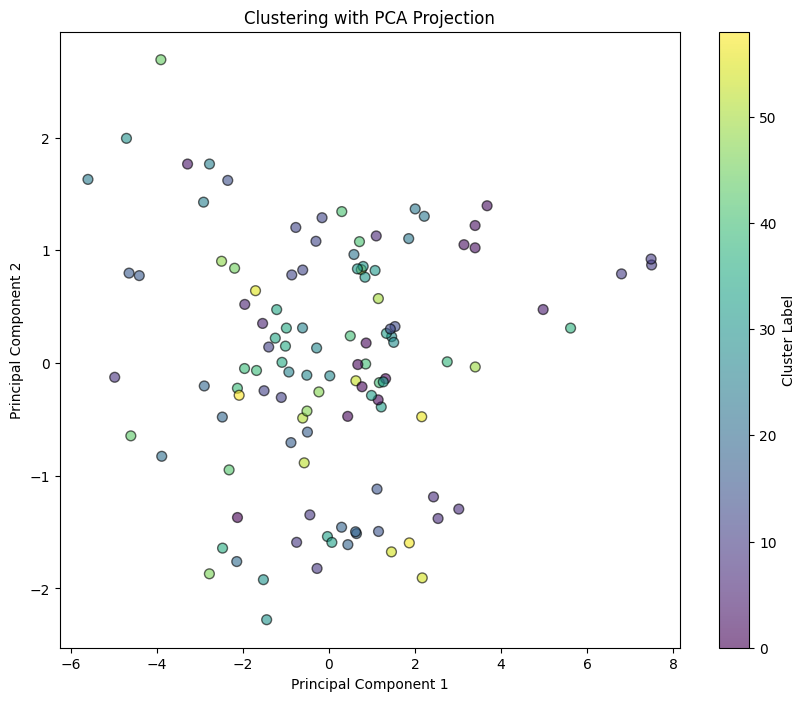

In [72]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA on the scaled data to reduce it to two dimensions for plotting
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Plot the first two principal components and color the points by cluster assignment
plt.figure(figsize=(10, 8))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6)
plt.title('Clustering with PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


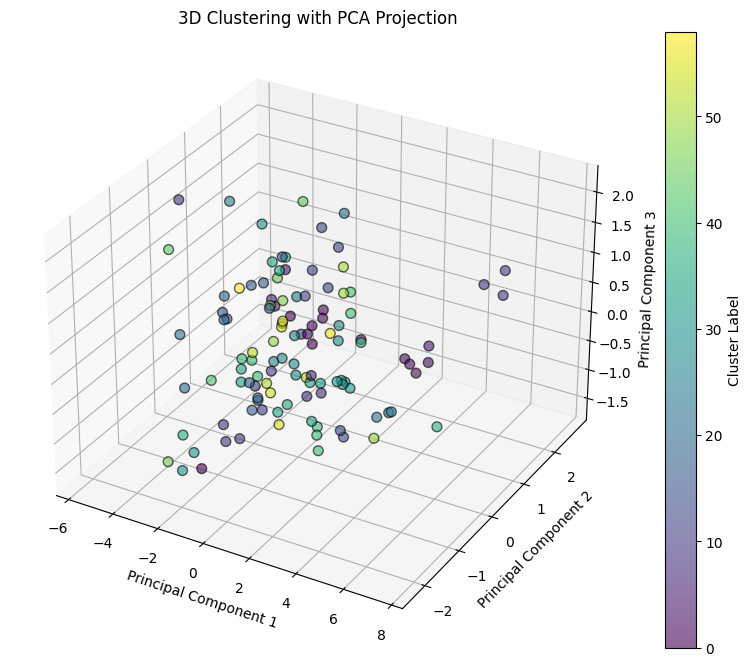

In [73]:
from mpl_toolkits.mplot3d import Axes3D

# Perform PCA on the scaled data to reduce it to three dimensions for plotting
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_scaled)

# Plot the first three principal components and color the points by cluster assignment
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6)
ax.set_title('3D Clustering with PCA Projection')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Create a colorbar to show the cluster labels
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Cluster Label')

plt.show()


In [76]:
## improving clustering
'''
calculate the variance of each feature and then select those with variance above a certain threshold. 
This threshold can be chosen based on domain knowledge, or you can use statistical methods 
like interquartile range (IQR) to help determine it.
'''

import pandas as pd
from sklearn.feature_selection import VarianceThreshold

# Assuming 'student_features.csv' is already loaded into features_df

# Drop non-numeric and target columns
#df_numeric_features = features_df.drop(['Student', 'Image Name', 'Percentage Black Pixels', 'Percentage White Pixels'], axis=1)

# Convert to numeric dtype if not already
df_numeric_features = df_numeric_features.apply(pd.to_numeric, errors='coerce')

# Apply Variance Threshold - this is just an example to start with
# You might need to adjust the threshold based on your dataset
selector = VarianceThreshold(threshold=0.5)  # Adjust this value as needed
df_high_variance = selector.fit_transform(df_numeric_features)

# For understanding which features are kept, you can do:
features_selected = df_numeric_features.columns[selector.get_support(indices=True)]
print("Selected features based on variance:", features_selected.tolist())


Selected features based on variance: ['Canny Edge', 'Sobel Edge', 'Endpoints', 'Thickness', 'Line Irregularity']


In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Scaling the selected features
scaler = StandardScaler()
df_high_variance_scaled = scaler.fit_transform(df_high_variance)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=38, random_state=42)  # Adjust the number of clusters if necessary
clusters = kmeans.fit_predict(df_high_variance_scaled)

# Assuming you have the true labels encoded as integers
true_labels = LabelEncoder().fit_transform(features_df['Student'])

# Calculate the Adjusted Rand Score
ari_score = adjusted_rand_score(true_labels, clusters)
print(f"Adjusted Rand Index: {ari_score}")


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KeyError: 'Student'

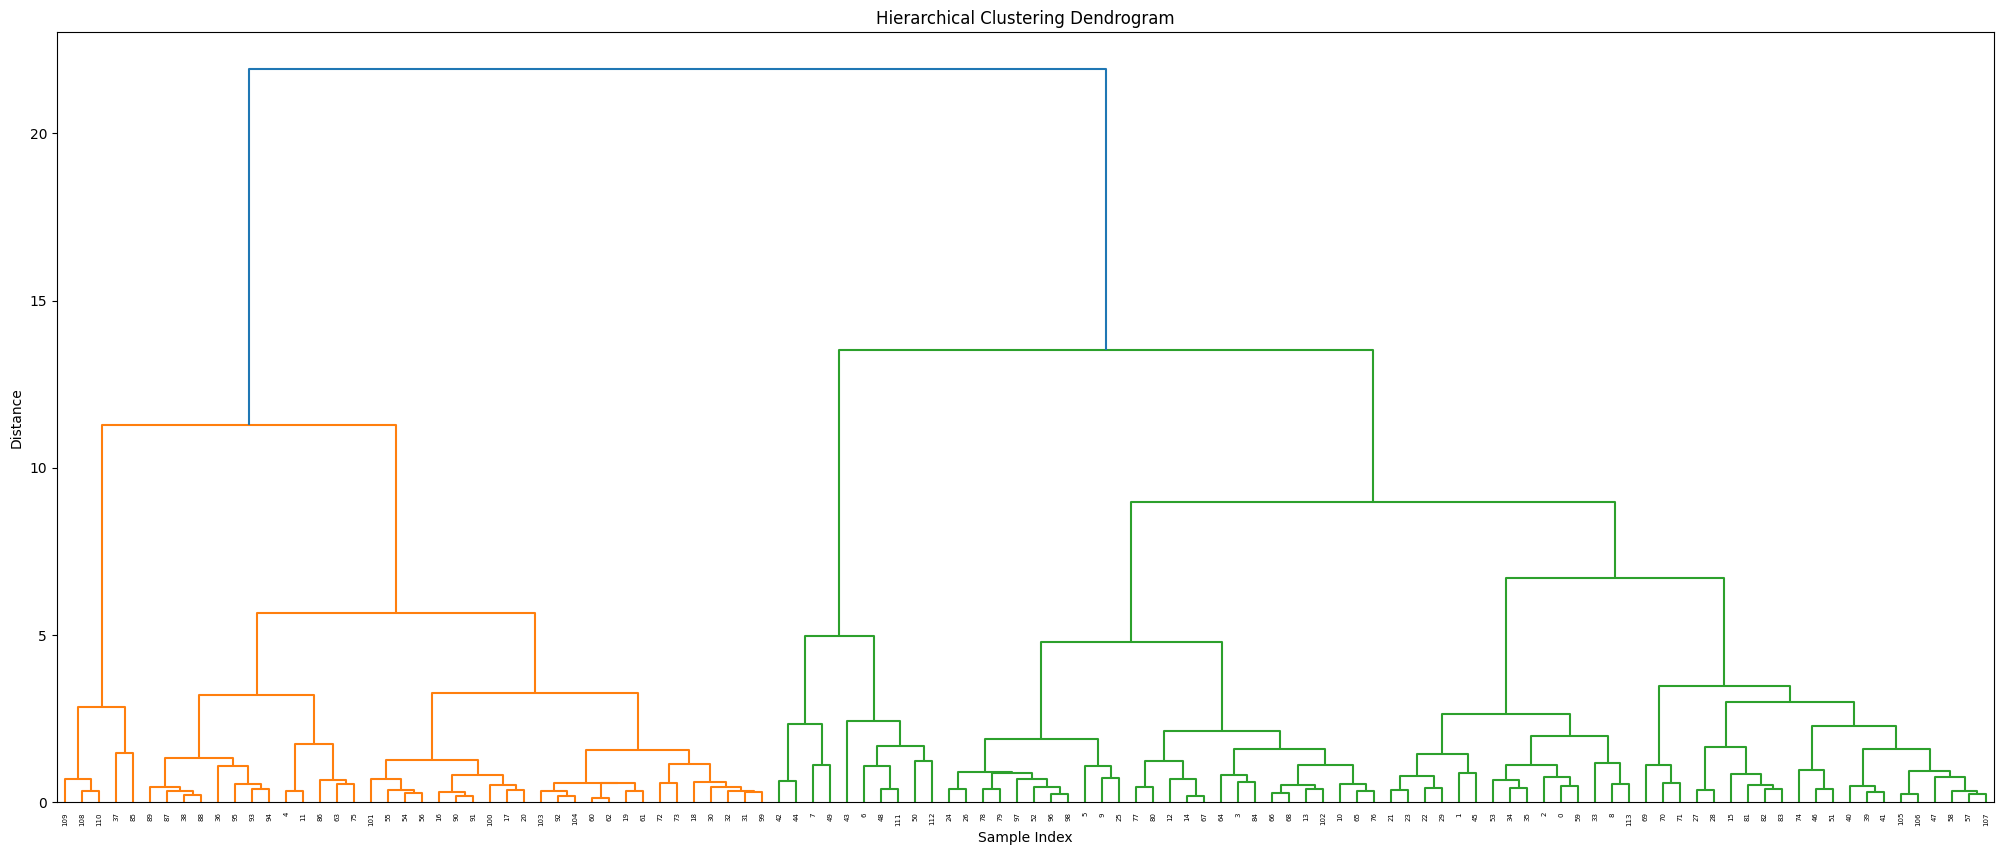

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

# Load the dataset and filter rows containing 'LND' in the 'Image Name'
df = pd.read_csv('student_features.csv')
df = df[df['Image Name'].str.contains('LND')]
original_df = df

# Drop non-numeric columns and columns with low variance
features_df = df.drop(['Student', 'Image Name', 'Percentage Black Pixels', 'Percentage White Pixels'], axis=1)
features_df = features_df.apply(pd.to_numeric, errors='coerce')

# Apply VarianceThreshold to select features with high variance
selector = VarianceThreshold(threshold=0.5)
df_high_variance = selector.fit_transform(features_df)
df_high_variance_scaled = StandardScaler().fit_transform(df_high_variance)

# Generate the linkage matrix using Ward's method
Z = linkage(df_high_variance_scaled, 'ward')

# Plot the dendrogram for visualizing the hierarchical clustering
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Choosing the number of clusters based on dendrogram or other criterion
num_clusters = 38  # Adjust based on observations

# Extract cluster labels
cluster_labels = fcluster(Z, num_clusters, criterion='maxclust')

# Add cluster labels back to the original dataframe (if needed)
original_df['Cluster'] = cluster_labels


In [82]:
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import LabelEncoder

# Assuming true writer labels are in 'Student' column of the original dataframe
true_labels_encoded = LabelEncoder().fit_transform(original_df['Student'])
ari_score = adjusted_rand_score(true_labels_encoded, cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari_score}")

Adjusted Rand Index (ARI): 0.3202187550265401


In [43]:
df_filtered = df[df['Image Name'].str.contains('LND')]
